In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_excel(r"C:\Users\marga\Downloads\DATA.xlsx")


In [3]:
# reset the options
pd.reset_option('display.max_rows')

# set the option to display the maximum number of columns
pd.set_option('display.max_columns', 50)

# set the option to display the maximum number of rows
pd.set_option('display.min_rows', 105)
pd.set_option('display.max_rows', 105)

pd.describe_option('display.max_rows')
pd.describe_option('display.max_columns')

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 105]
display.max_columns : int
    If max_cols is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the width of the te

In [4]:
# check the column names - notice the extra ' single quote
print(data.columns)

Index([''ID Number'', ''Status'', ''Type'', ''Aluminum'', ''Antimony'',
       ''Arsenic'', ''Barium'', ''Beryllium'', ''Bismuth'', ''Cadmium'',
       ''Cesium'', ''Gadolinium'', ''Lead'', ''Mercury'', ''Nickel'',
       ''Palladium'', ''Platinum'', ''Tellurium'', ''Thallium'', ''Thorium'',
       ''Tin'', ''Tungsten'', ''Uranium'', ''Boron'', ''Calcium'',
       ''Chromium'', ''Cobalt'', ''Copper'', ''Iron'', ''Lithium'',
       ''Magnesium'', ''Manganese'', ''Molybdenum'', ''Phosphorus'',
       ''Potassium'', ''Selenium'', ''Sodium'', ''Strontium'', ''Sulfur'',
       ''Vanadium'', ''Zinc'', ''Creatinine''],
      dtype='object')


In [5]:
# clean up the column names removing the extra '
data.columns = data.columns.str.replace("'", "")

In [6]:
# check the column names
print(data.columns)

Index(['ID Number', 'Status', 'Type', 'Aluminum', 'Antimony', 'Arsenic',
       'Barium', 'Beryllium', 'Bismuth', 'Cadmium', 'Cesium', 'Gadolinium',
       'Lead', 'Mercury', 'Nickel', 'Palladium', 'Platinum', 'Tellurium',
       'Thallium', 'Thorium', 'Tin', 'Tungsten', 'Uranium', 'Boron', 'Calcium',
       'Chromium', 'Cobalt', 'Copper', 'Iron', 'Lithium', 'Magnesium',
       'Manganese', 'Molybdenum', 'Phosphorus', 'Potassium', 'Selenium',
       'Sodium', 'Strontium', 'Sulfur', 'Vanadium', 'Zinc', 'Creatinine'],
      dtype='object')


In [8]:
data.shape



(105, 42)

In [9]:
# usually objects are you key factors/independent variables where floats and ints are continuous/dependent variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID Number   105 non-null    int64  
 1   Status      105 non-null    object 
 2   Type        105 non-null    object 
 3   Aluminum    105 non-null    float64
 4   Antimony    105 non-null    float64
 5   Arsenic     105 non-null    float64
 6   Barium      105 non-null    float64
 7   Beryllium   105 non-null    float64
 8   Bismuth     105 non-null    float64
 9   Cadmium     105 non-null    float64
 10  Cesium      105 non-null    float64
 11  Gadolinium  105 non-null    float64
 12  Lead        105 non-null    float64
 13  Mercury     105 non-null    float64
 14  Nickel      105 non-null    float64
 15  Palladium   105 non-null    float64
 16  Platinum    105 non-null    float64
 17  Tellurium   105 non-null    float64
 18  Thallium    105 non-null    float64
 19  Thorium     105 non-null    f

In [10]:
# Calculate summary statistics for each element
stats = data.describe()

# View the summary statistics
print(stats)

        ID Number    Aluminum    Antimony     Arsenic      Barium   Beryllium  \
count  105.000000  105.000000  105.000000  105.000000  105.000000  105.000000   
mean    38.666667    9.368598    0.059104   13.691641    2.718096    0.000458   
std     20.301415   12.035546    0.135363   16.684145    2.526504    0.000168   
min      1.000000    0.001414    0.000028    0.001061    0.000071    0.000177   
25%     22.000000    2.500000    0.000057    5.000000    1.100000    0.000354   
50%     41.000000    5.600000    0.000113   11.000000    1.900000    0.000354   
75%     56.000000   10.000000    0.070000   15.000000    3.300000    0.000707   
max     71.000000   74.000000    0.900000  120.000000   15.000000    0.000707   

          Bismuth     Cadmium      Cesium  Gadolinium        Lead     Mercury  \
count  105.000000  105.000000  105.000000  105.000000  105.000000  105.000000   
mean     0.315303    0.084427    5.382857    0.315966    0.374105    0.104033   
std      1.613558    0.1245

In [11]:
# drop rows with missing values if there are any
data = data.dropna()

In [12]:
data.shape

(105, 42)

In [13]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# View the correlation matrix
#print(corr_matrix)
corr_matrix

,ID Number,Aluminum,Antimony,Arsenic,Barium,Beryllium,Bismuth,Cadmium,Cesium,Gadolinium,Lead,Mercury,Nickel,Palladium,Platinum,Tellurium,Thallium,Thorium,Tin,Tungsten,Uranium,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
ID Number,1.000000,0.025106,-0.006204,-0.068678,-0.047197,0.009830,0.021172,-0.142966,-0.052259,-0.105729,0.069224,-0.185647,-0.096048,0.009830,0.009830,0.009830,-0.118778,0.009830,0.207369,0.126954,0.061611,0.017797,-0.089696,-0.014569,0.034815,0.073617,-0.095383,0.044615,0.068836,-0.074002,0.187470,0.245901,-0.029939,0.159118,0.066560,-0.037470,0.211192,0.066062,0.094058,-0.035651
Aluminum,0.025106,1.000000,0.532296,0.031023,0.561186,-0.313495,-0.087201,-0.182321,0.453143,-0.021330,0.725451,-0.177115,0.295885,-0.313495,-0.313495,-0.313495,0.394521,-0.313495,0.320742,0.214864,0.291031,0.603613,0.271930,0.182968,-0.106711,0.378699,0.247920,0.188302,0.373055,0.604131,0.199987,0.320706,0.342633,0.303722,0.302600,0.341868,0.292267,0.384464,0.437954,-0.321199
Antimony,-0.006204,0.532296,1.000000,-0.010960,0.484427,-0.209752,-0.084805,-0.218317,0.513796,0.102337,0.449560,-0.161072,0.214894,-0.209752,-0.209752,-0.209752,0.350666,-0.209752,0.238305,0.222868,0.110501,0.491555,0.161993,0.156073,-0.203784,0.366781,0.067553,0.195354,0.302425,0.376494,0.249705,0.420342,0.280343,0.472690,0.405663,0.248954,0.288167,0.345519,0.335905,-0.204249
Arsenic,-0.068678,0.031023,-0.010960,1.000000,0.161066,-0.131157,0.198150,0.031913,0.128612,0.125722,0.128677,0.206379,0.260092,-0.131157,-0.131157,-0.131157,0.154223,-0.131157,0.074626,0.151141,0.007994,0.210529,0.305217,0.060902,0.009817,0.236953,0.316601,0.189789,0.158090,0.099874,0.237693,0.072081,0.055149,0.236785,0.114267,0.305293,0.195046,0.063726,0.167114,-0.159852
Barium,-0.047197,0.561186,0.484427,0.161066,1.000000,-0.385239,-0.066116,-0.271425,0.588356,0.049607,0.700279,-0.047586,0.524874,-0.385239,-0.385239,-0.385239,0.413731,-0.385239,0.311581,0.264532,0.200961,0.566061,0.607971,-0.037510,-0.086025,0.539845,0.566208,0.348844,0.536562,0.559368,0.322346,0.388129,0.364859,0.392447,0.540400,0.707209,0.378205,0.334026,0.407007,-0.399711
Beryllium,0.009830,-0.313495,-0.209752,-0.131157,-0.385239,1.000000,-0.085161,0.303654,-0.477927,0.147322,-0.374315,-0.089416,-0.272355,1.000000,1.000000,1.000000,-0.428571,1.000000,-0.198651,-0.121862,-0.124036,-0.400119,-0.284208,0.179564,0.245151,-0.462320,-0.229203,-0.356545,-0.425584,-0.414037,-0.184318,-0.301654,-0.416752,-0.445297,-0.456737,-0.380233,-0.486205,-0.111567,-0.296892,0.865015
Bismuth,0.021172,-0.087201,-0.084805,0.198150,-0.066116,-0.085161,1.000000,0.111266,-0.068446,-0.019243,-0.028829,0.404030,-0.035272,-0.085161,-0.085161,-0.085161,0.063289,-0.085161,-0.091177,-0.120151,-0.044087,-0.049364,0.026306,-0.074184,-0.109473,-0.062355,0.019324,0.004628,-0.123067,-0.060311,-0.079916,-0.102857,-0.091591,-0.085143,-0.037871,-0.006128,-0.085310,-0.108672,-0.021175,-0.089311
Cadmium,-0.142966,-0.182321,-0.218317,0.031913,-0.271425,0.303654,0.111266,1.000000,-0.250934,-0.066169,-0.250877,0.285645,-0.108825,0.303654,0.303654,0.303654,-0.173383,0.303654,-0.272819,-0.153712,-0.123585,-0.221402,-0.054788,-0.039434,0.269231,-0.273257,-0.043513,-0.285935,-0.298416,-0.217192,-0.232311,-0.254548,-0.299062,-0.311370,-0.249360,-0.188338,-0.302540,-0.206522,-0.155406,0.332258
Cesium,-0.052259,0.453143,0.513796,0.128612,0.588356,-0.477927,-0.068446,-0.250934,1.000000,-0.060730,0.662181,-0.008569,0.512829,-0.477927,-0.477927,-0.477927,0.656613,-0.477927,0.352597,0.271948,0.060690,0.754425,0.347428,0.049762,-0.076757,0.570014,0.316971,0.392595,0.586727,0.691238,0.364315,0.466380,0.651633,0.563441,0.585585,0.469872,0.533147,0.373248,0.348392,-0.525564
Gadolinium,-0.105729,-0.021330,0.102337,0.125722,0.049607,0.147322,-0.019243,-0.066169,-0.060730,1.000000,0.006165,-0.040569,0.217495,0.147322,0.147322,0.147322,-0.080567,0.147322,0.141470,

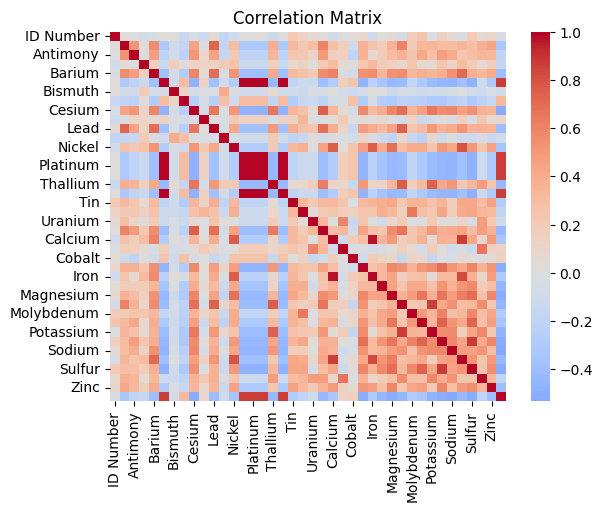

In [14]:
# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Principal component analysis (PCA):
PCA is a technique used to reduce the dimensionality of a data set by identifying the underlying structure in the data. This technique can be used to identify the most important elements that explain the majority of the variation in the data.

In [16]:
# Separate the features (elements) from the target variable (status)
X = data.drop(['ID Number', 'Status', 'Type'], axis=1)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(X)

# Access the loadings or weights of each original feature on each principal component
loadings = pca.components_

# Print the loadings for each original feature on each principal component
for i, component in enumerate(loadings):
    print("Principal Component ", i+1, ":")
    for j, feature in enumerate(X.columns):
        print("\t", feature, ":", component[j])

Principal Component  1 :
	 Aluminum : 0.006717490208710373
	 Antimony : 8.75537678381999e-05
	 Arsenic : 0.003916356397963006
	 Barium : 0.001787897457087996
	 Beryllium : -1.1745212152028872e-07
	 Bismuth : -0.0002692576979381126
	 Cadmium : -6.170576937083141e-05
	 Cesium : 0.0030611198203823018
	 Gadolinium : -0.00046323759637514715
	 Lead : 0.0002494044414890589
	 Mercury : -7.744461925986799e-05
	 Nickel : 0.0020929728597890124
	 Palladium : -1.4094254582434378e-07
	 Platinum : -1.8792339443245922e-08
	 Tellurium : -9.396169721622901e-08
	 Thallium : 7.977782452376666e-05
	 Thorium : -7.0471272912171975e-09
	 Tin : 0.0013069032788423048
	 Tungsten : 0.00017413208155633237
	 Uranium : -1.6152778807867753e-06
	 Boron : 0.001082878722299038
	 Calcium : 0.07287563122456993
	 Chromium : -5.2290194531048374e-08
	 Cobalt : 6.5030299848281e-08
	 Copper : 8.454100095449438e-06
	 Iron : 0.00010948514701492203
	 Lithium : 5.591785727287478e-05
	 Magnesium : 0.11358943040772838
	 Manganese : 

In [15]:
# Separate the features (elements) from the target variable (status)
X = data.drop(['ID Number', 'Status', 'Type'], axis=1)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(X)

# Access the loadings or weights of each original feature on each principal component
loadings = pca.components_

# Print the loadings for each original feature on each principal component
print(loadings)

[[ 6.71749021e-03  8.75537678e-05  3.91635640e-03 ...  1.19700309e-07
   2.70049169e-04 -4.65710964e-02]
 [ 1.08999634e-03  9.71313756e-05 -1.27333007e-02 ...  5.07805608e-08
  -1.64897982e-04  6.90587151e-02]
 [ 2.53027001e-02  2.20889469e-04  2.69448596e-02 ...  7.91454957e-07
   4.85860762e-04 -2.56491783e-01]
 ...
 [-0.00000000e+00 -5.34294831e-16  2.64149113e-17 ... -1.48777515e-13
  -1.38777878e-16  5.55111512e-17]
 [ 0.00000000e+00  2.22044605e-16 -4.82319386e-17 ... -8.63416259e-14
   1.11022302e-16  5.55111512e-17]
 [-0.00000000e+00  1.94289029e-16  3.86514308e-17 ...  1.58643850e-13
  -1.11022302e-16  5.55111512e-17]]


In [17]:
# Separate the features (elements) from the target variable (status)
X = data.drop(['ID Number', 'Status', 'Type'], axis=1)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(X)

# View the explained variance ratio for each principal component
print(pca.explained_variance_ratio_)

[8.21284032e-01 1.22954102e-01 2.48527121e-02 1.63049604e-02
 7.87756879e-03 4.17822035e-03 1.69153873e-03 5.52613242e-04
 2.49412097e-04 2.26399891e-05 1.16009079e-05 5.69540505e-06
 5.28703230e-06 5.05172922e-06 2.40209546e-06 1.69186770e-06
 1.17741490e-07 1.08855319e-07 9.77403577e-08 8.01258834e-08
 2.34111648e-08 1.84953377e-08 9.78519512e-09 5.40080898e-09
 3.64400680e-09 2.41344127e-09 1.76675172e-09 1.60552387e-09
 3.45930875e-10 3.78358016e-11 4.26781941e-13 3.29829283e-13
 8.60169875e-14 3.71575744e-14 1.01506175e-14 7.12395348e-33
 7.12395348e-33 7.12395348e-33 7.12395348e-33]
